# BikeMaps.Org Data for Victoria, BC

# Abstract

# Introduction 

# Methods

# Results

# Discussion

# Conclusion

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import pysal
import pysal.spatial_dynamics.interaction as interaction
np.random.seed(100)
import datetime


## Collisions Data Set

In [17]:
collisions = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/col.csv')
collisions.dtypes

i_type               object
incident_with        object
date                 object
p_type               object
details              object
incident_effect      object
injury               object
trip_purpose         object
regular_cyclist      object
helmet               object
intoxicated          object
road_conditions      object
sightlines           object
cars_on_roadside     object
riding_on            object
bike_lights          object
terrain              object
direction            object
turning              object
age                 float64
birthmonth          float64
sex                  object
pk                    int64
x                   float64
y                   float64
dtype: object

In [18]:
theft = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/theft.csv')
theft.head()

,i_type,date,p_type,details,how_locked,lock,locked_to,lighting,traffic,police_report,police_report_num,insurance_claim,insurance_claim_num,regular_cyclist,pk,longitude,latitude
0,Minor bike component,2015-06-29T19:30:00,theft,Quick release removed from back wheel - i.e. i...,Frame and tire locked,U-Lock,Good,NaN,Medium,True,T15000455,False,NaN,Y,1253,-123.386807,48.437529
1,Bike (value < $1000),2015-07-28T02:00:00,theft,Bike stolen from under the Petch Building bree...,Frame locked,Cable lock,Moderate,NaN,Very Low,True,NaN,False,NaN,Y,1421,-123.310697,48.461660
2,Minor bike component,2015-07-24T21:30:00,theft,Bike helmet stolen. It was not locked.,Frame and tire locked,Cable lock,Moderate,NaN,High,False,NaN,False,NaN,Y,1493,-123.364642,48.427851
3,Bike (value < $1000),2015-04-17T21:00:00,theft,parked at work inside locked bike cage room. D...,Not locked,NaN,Moderate,NaN,Very Low,True,NaN,False,NaN,Y,1614,-123.361670,48.426880
4,Bike (value < $1000),2015-02-03T17:30:00,theft,"This was an unfortunate situation where I ""loc...",Not locked,NaN,Good,NaN,Low,True,NaN,False,NaN,Y,1636,-123.378739,48.440147


In [34]:
#hazards = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/hazards.csv')

In [4]:
near_miss = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/near_miss.csv')

In [7]:
date = collisions['date']


def changetime(x):
    t1 = pd.to_datetime(x, format ='%Y-%m-%dT%H:%M:%S')
    #t2 = pd.Timestamp(np.datetime64(t1))
    t3 = t1.to_pydatetime()
    return t3

                               
collisions['T_test3'] = collisions['date'].apply(changetime)

collisions['T_test3']

collisions['just_date'] = collisions['T_test3'].dt.date

collisions.head()


,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helmet,...,direction,turning,age,birthmonth,sex,pk,x,y,T_test3,just_date
0,Collision with moving object or vehicle,"Vehicle, angle",2014-12-04T22:30:00,collision,Cab pulled an illegal u-turn and I collided wi...,NaN,No injury,Social reason,Y,Y,...,E,Heading straight,NaN,NaN,M,1090,-123.343377,48.434454,2014-12-04 22:30:00,2014-12-04
1,Collision with moving object or vehicle,"Vehicle, side",2015-07-28T10:30:00,collision,Vehicle turned left into my lane. I was unable...,NaN,"Injury, hospital emergency visit",Exercise or recreation,Y,Y,...,NW,Heading straight,1941,5,M,1427,-123.418093,48.621903,2015-07-28 10:30:00,2015-07-28
2,Collision with moving object or vehicle,"Vehicle, head on",2015-06-02T17:20:00,collision,I attended an head on accident between two mal...,NaN,"Injury, hospitalized",Exercise or recreation,NaN,NaN,...,NaN,Turning left,NaN,NaN,NaN,1510,-123.398636,48.592406,2015-06-02 17:20:00,2015-06-02
3,Collision with moving object or vehicle,Another cyclist,2015-05-06T09:00:00,collision,I was traveling south on Borden crossing McKen...,NaN,"Injury, no treatment",Commute,Y,Y,...,SW,Turning right,1958,7,M,917,-123.361423,48.470311,2015-05-06 09:00:00,2015-05-06
4,Fall,Train Tracks,2015-05-30T17:30:00,collision,Riding up the hill and my wheel caught in the ...,NaN,"Injury, no treatment",Commute,Y,Y,...,I don't know,Heading straight,1955,4,F,1052,-123.475707,48.447650,2015-05-30 17:30:00,2015-05-30


In [12]:
ordered_c = collisions.sort_values(by = 'T_test3')

def time_diff(x):
    timesince = x - ordered_c['T_test3'][0] 
    return int(timesince.total_seconds() / 60)

time_diff(ordered_c['T_test3'][0])

#ordered_c['t_d'] = ordered_c['T_test3'].apply(time_diff)

#print(ordered_c['T_test3'][0])

0

In [13]:

#ordered_c['value_t'] = ordered_c.apply(lambda row: time_diff(row['T_test3'], axis=1))


#ordered_c.head()

#x = np.array(ordered_c['T_test3'])

#np.apply

#ordered_c['d'] = ordered_c["T_test3"].apply(time_diff)

#time_diff(ordered_c['T_test3'][0])

#ordered_c


ordered_c['T_test3'][0].timestamp()

#print(ordered_c['T_test3'][0])
def seconds(x):
    return int(x.timestamp())

ordered_c['seconds'] = ordered_c['T_test3'].apply(seconds)
#1097793000
#2004-10-14 16:30:00

ordered_c.head()

#print(seconds(ordered_c['T_test3'][0]))

#print(ordered_c['T_test3'][0])
#print()

ordered_c.dtypes

i_type                      object
incident_with               object
date                        object
p_type                      object
details                     object
incident_effect             object
injury                      object
trip_purpose                object
regular_cyclist             object
helmet                      object
intoxicated                 object
road_conditions             object
sightlines                  object
cars_on_roadside            object
riding_on                   object
bike_lights                 object
terrain                     object
direction                   object
turning                     object
age                        float64
birthmonth                 float64
sex                         object
pk                           int64
x                          float64
y                          float64
T_test3             datetime64[ns]
just_date                   object
seconds                      int64
dtype: object

In [38]:
#from shapely.geometry import Point
#collisions['geometry'] = collisions.apply(lambda x: Point((float(x.x), float(x.y))), axis=1)

#import geopandas
#gp_collisions = geopandas.GeoDataFrame(collisions, geometry='geometry')

#gp_collisions.head()

#gp_collisions.to_file('collisions_2.shp', driver='ESRI Shapefile')

In [93]:
collisions3 = ordered_c[['x', 'y', 'seconds']]

collisions3.head()

collisions3.to_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/xytime_collisions.csv')

In [94]:
path = "/anaconda/lib/python3.5/site-packages/pysal/examples/burkitt/burkitt.shp" 

#hacking work around- re-named my data to match the example data in PySAL examples folder 

In [125]:
#Modified Knox Test 

events = interaction.SpaceTimeEvents(path, 'seconds')
events.n

events.space[0]

events.t[0] #time not in the rigth formatt- must be in Python datetime 
events.t[1] - events.t[0]


result = interaction.modified_knox(events.space, events.t,delta=20,tau=5,permutations=99)

print("%2.8f"%result['stat'])


0.00000000


In [126]:
 print(result['stat'])

0.0


In [143]:
#Knox Test
result = interaction.knox(events.space, events.t ,delta=50,tau=500,permutations=99)
print(result['stat'])

print("%2.2f"%result['pvalue']) #can reject null hypothesis that there was no interaction in space and time

3
0.01


In [146]:
#Mantel Test

mt = interaction.mantel(events.space, events.t,99,scon=0.0,spow=1.0,tcon=0.0,tpow=1.0)
print("%6.6f"%mt['stat'])

print("%2.2f"%result['pvalue'])

//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)


-0.017663
0.01


In [150]:
result_j = interaction.jacquez(events.space, events.t ,k=3,permutations=99)

print(result_j['stat'])

print("%3.1f"%result_j['pvalue'])

15
0.1


# Near Miss Data Set Pysal Analaysis 

In [16]:
near_miss['datetime'] = near_miss['date'].apply(changetime)
near_miss['seconds'] = near_miss['datetime'].apply(seconds)

near_miss.head()

,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helemt,...,direction,turning,age,birthmonth,sex,pk,longitude,latitude,datetime,seconds
0,Near collision with moving object or vehicle,"Vehicle, head on",2014-10-08T17:00:00,nearmiss,Vehicle was turning left onto Shelbourne from ...,NaN,No injury,Commute,Y,Y,...,W,Heading straight,1990,6,F,940,-123.333700,48.436077,2014-10-08 17:00:00,1412809200
1,Near collision with moving object or vehicle,"Vehicle, rear end",2015-05-27T17:05:00,nearmiss,"Biking along, car was passing me, realized the...",NaN,No injury,During work,Y,Y,...,W,Heading straight,1982,8,M,1011,-123.334365,48.416741,2015-05-27 17:05:00,1432767900
2,Near collision with moving object or vehicle,"Vehicle, side",2015-08-06T09:30:00,nearmiss,My children and I were walking our bikes acros...,NaN,No injury,Personal business,Y,Y,...,E,Heading straight,1975,4,F,1472,-123.315901,48.426492,2015-08-06 09:30:00,1438875000
3,Near collision with moving object or vehicle,"Vehicle, angle",2015-09-11T17:10:00,nearmiss,After pushing the crosswalk button a grey truc...,NaN,No injury,Commute,Y,Y,...,NE,Heading straight,1990,7,F,1581,-123.367893,48.463314,2015-09-11 17:10:00,1442013000
4,Near collision with moving object or vehicle,"Vehicle, side",2015-09-02T09:30:00,nearmiss,car cut in front of me in order to turn left. ...,NaN,No injury,Commute,NaN,NaN,...,E,Heading straight,NaN,NaN,NaN,1606,-123.344364,48.448219,2015-09-02 09:30:00,1441207800


In [20]:
near_miss.to_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/near_miss2_collisions.csv')

In [21]:
path_nm = "/anaconda/lib/python3.5/site-packages/pysal/examples/Line/Line.shp" 

In [25]:
events_nm = interaction.SpaceTimeEvents(path_nm, 'seconds')
events_nm.n

events_nm.t[1] - events_nm.t[0]

array([19958700])

In [26]:
#Knox Test 
result_nm = interaction.knox(events_nm.space, events_nm.t ,delta=50,tau=500,permutations=99)
print(result_nm['stat'])

print("%2.2f"%result_nm['pvalue'])

23
0.01


In [28]:
#Mantel Test

mt_nm = interaction.mantel(events_nm.space, events_nm.t,99,scon=0.0,spow=1.0,tcon=0.0,tpow=1.0)
print("%6.6f"%mt_nm['stat'])

print("%2.2f"%result_nm['pvalue'])

//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)


-0.025118
0.01


In [29]:
#Jacquez Test Near Misses 
result_j_nm = interaction.jacquez(events_nm.space, events_nm.t ,k=3,permutations=99)

print(result_j_nm['stat'])

print("%3.1f"%result_j_nm['pvalue'])

6
0.8


# Visualizations wth PyClust

In [19]:
import scipy
import treelib
import pyclust
from scipy.spatial.distance import squareform, pdist

collisions_matrix_df = collisions[['x', 'y']]


collisions_matrix_df.insert(0, 'Crash_ID', range(0, 0 + len(collisions_matrix_df)))

collisions_matrix_df
    
x = pd.DataFrame(squareform(pdist(collisions_matrix_df.ix[:, 1:])), columns=collisions_matrix_df.Crash_ID.unique(), index=collisions_matrix_df.Crash_ID.unique())


#collisions_matrix_df['crash_site']

In [ ]:
#pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [138]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()

[[ 0.09974725  0.16755994]
 [ 0.03027187  0.19212526]
 [ 0.19261666  0.02913908]]


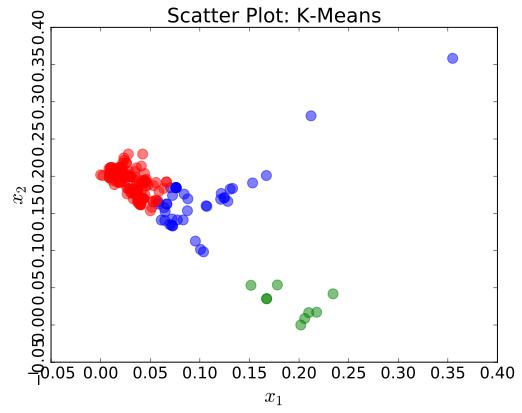

In [142]:
km = pyclust.KMeans(n_clusters=3)

km.fit(x.iloc[:,0:2].values)

print(km.centers_)

plot_scatter(x.iloc[:,0:2].values, labels=km.labels_, title="Scatter Plot: K-Means")

In [ ]:
# near miss K-means clustering visualization 